<a href="https://colab.research.google.com/github/Hamza1407/AnalyseTemp/blob/main/Clustering_Heures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Clustering des périodes horaires sur les données 2022**

Hamza BELABBES

L'objectif de ce notebook est de déterminer des plages horaires regroupant la consommation de l'ensemble des clients. En d'autres termes, l'objectif est d'identifier les moments de la journée où la consommation est à son minimum (heures creuses) et à son maximum (heures pleines).

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px



warnings.filterwarnings(action="ignore")

Les données ont été préalablement nettoyées et réorganisées pour créer un ensemble de données comprenant des colonnes détaillant la période horaire, telles que 'Heure', 'Jour', 'Mois' et 'Année', ainsi que des colonnes décrivant la consommation de chaque client. L'ensemble de données totalise un peu plus de 17 500 lignes, représentant la consommation sur l'ensemble de l'année 2022, avec une valeur enregistrée pour chaque demi-heure.

In [4]:
df=pd.read_csv('/content/Join_30_min.csv')
df=df.drop(columns=['Unnamed: 0'])
df.head()

,AMTE4,Jour semaine,Mois,Année,Jour,Heure,AMTE3,AMTE2,Indus8,AMTE1,...,Private6,College1-5,Indus5,College2-1,College2-3,Indus7,College2-2,Indus3,Indus1,College2-4
0,5000.0,5,1,2022,1,0,64000.0,27000.0,2000.000000,42000.0,...,84.0,380.0,10333.333333,208.0,14333.333333,4333.333333,190.0,8666.666667,1666.666667,146.0
1,6000.0,5,1,2022,1,0,67000.0,26000.0,2000.000000,42000.0,...,50.0,156.0,9333.333333,1560.0,14000.000000,4333.333333,168.0,9333.333333,1500.000000,132.0
2,5000.0,5,1,2022,1,1,68000.0,26000.0,2000.000000,43000.0,...,126.0,246.0,10333.333333,1252.0,14000.000000,4000.000000,134.0,12333.333333,1666.666667,178.0
3,5000.0,5,1,2022,1,1,66000.0,25000.0,2333.333333,43000.0,...,108.0,234.0,9333.333333,410.0,14666.666667,4333.333333,148.0,8333.333333,1666.666667,138.0
4,6000.0,5,1,2022,1,2,69000.0,26000.0,2000.000000,41000.0,...,2498.0,326.0,10666.666667,246.0,14333.333333,4333.333333,206.0,8666.666667,1833.333333,130.0


Notre modèle de clustering sera entraîné sur les données de consommation des clients, que nous stockerons dans notre DataFrame. Ensuite, nous normaliserons individuellement chaque colonne à l'aide de *MinMaxScaler*. Cela est nécessaire pour éviter que notre modèle de plus proches voisins ne soit fortement influencé par les variations des valeurs de puissance d'un client à l'autre.

In [6]:
X = df.drop(columns=['Jour semaine', 'Mois', 'Année', 'Jour', 'Heure'])
scaler = MinMaxScaler()

X_standarized= df.drop(columns=['Jour semaine', 'Mois', 'Année', 'Jour', 'Heure'])



for x in X_standarized.columns:
    col_to_normalize=X_standarized[x]
    col_to_normalize = col_to_normalize.values.reshape(-1, 1)

    col_to_normalize = scaler.fit_transform(col_to_normalize)
    X_standarized[x] = col_to_normalize

Bien que nous ayons une idée du nombre de clusters que nous cherchons à trouver, nous utiliserons la méthode du coude de Jambu pour confirmer ce nombre.

In [7]:
n_clusters=10
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X_standarized)
    cost.append(kmean.inertia_)

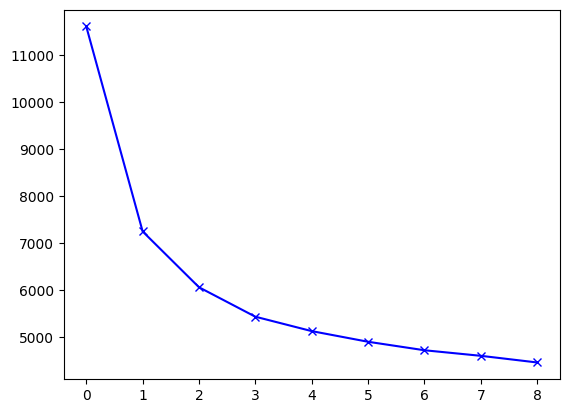

In [8]:
plt.plot(cost, 'bx-')

L'inertie commence à décroitre plus lentement à partir de 2 clusters ce qui confirme notre intuition.

### **Entraînement du modèle :**

In [9]:
kmean= KMeans(2)
kmean.fit(X_standarized)
labels=kmean.labels_

In [10]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,AMTE4,Jour semaine,Mois,Année,Jour,Heure,AMTE3,AMTE2,Indus8,AMTE1,...,College1-5,Indus5,College2-1,College2-3,Indus7,College2-2,Indus3,Indus1,College2-4,cluster
0,5000.0,5,1,2022,1,0,64000.0,27000.0,2000.000000,42000.0,...,380.0,10333.333333,208.0,14333.333333,4333.333333,190.0,8666.666667,1666.666667,146.0,1
1,6000.0,5,1,2022,1,0,67000.0,26000.0,2000.000000,42000.0,...,156.0,9333.333333,1560.0,14000.000000,4333.333333,168.0,9333.333333,1500.000000,132.0,1
2,5000.0,5,1,2022,1,1,68000.0,26000.0,2000.000000,43000.0,...,246.0,10333.333333,1252.0,14000.000000,4000.000000,134.0,12333.333333,1666.666667,178.0,1
3,5000.0,5,1,2022,1,1,66000.0,25000.0,2333.333333,43000.0,...,234.0,9333.333333,410.0,14666.666667,4333.333333,148.0,8333.333333,1666.666667,138.0,1
4,6000.0,5,1,2022,1,2,69000.0,26000.0,2000.000000,41000.0,...,326.0,10666.666667,246.0,14333.333333,4333.333333,206.0,8666.666667,1833.333333,130.0,1


Affichons la répartition des valeurs de chaque colonne en fonction des clusters et essayons de dégager de l'information utilie concernant ces derniers.

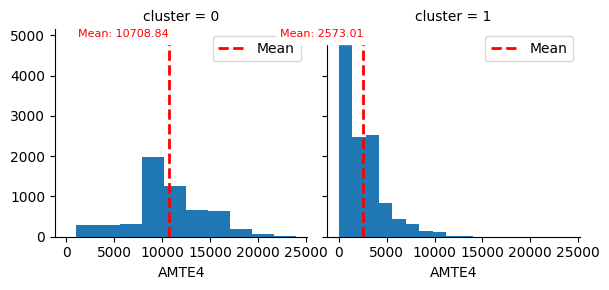

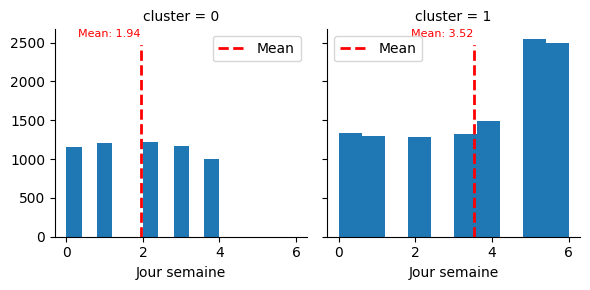

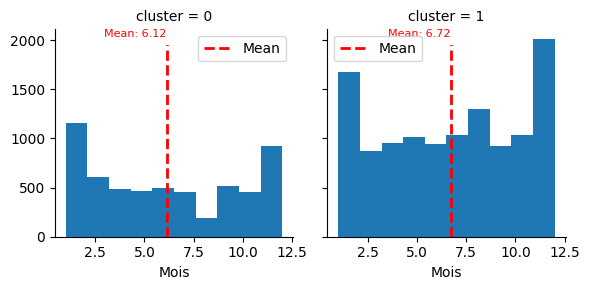

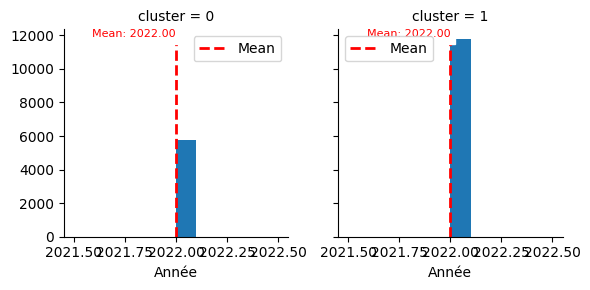

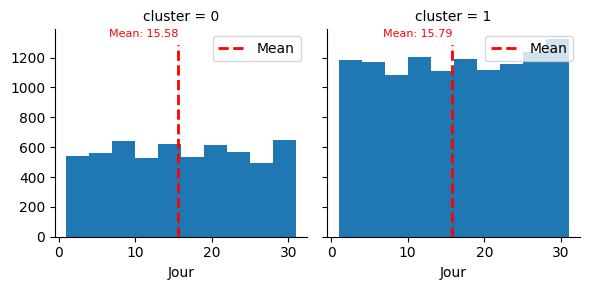

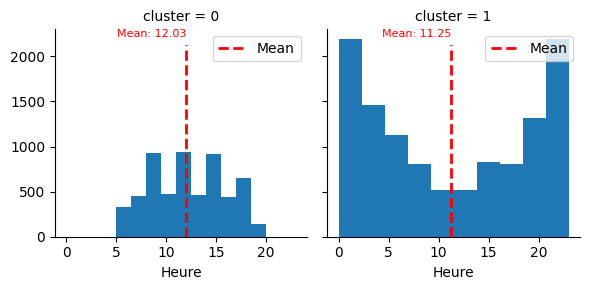

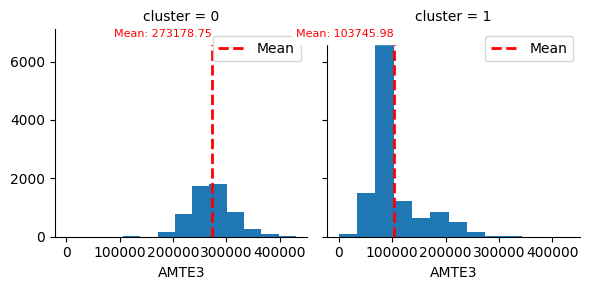

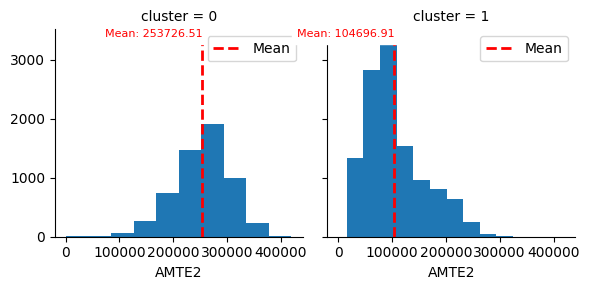

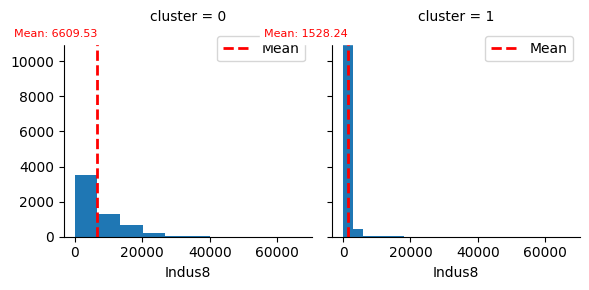

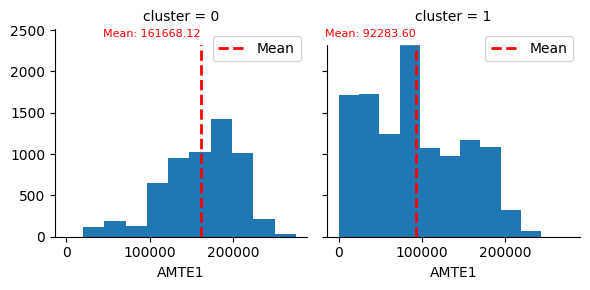

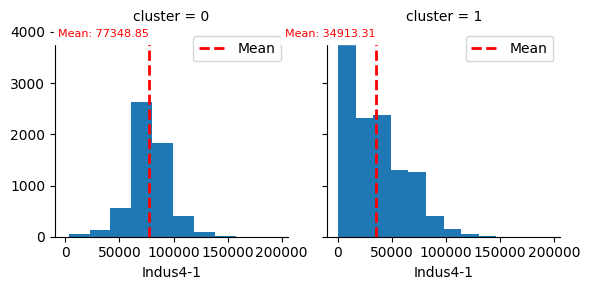

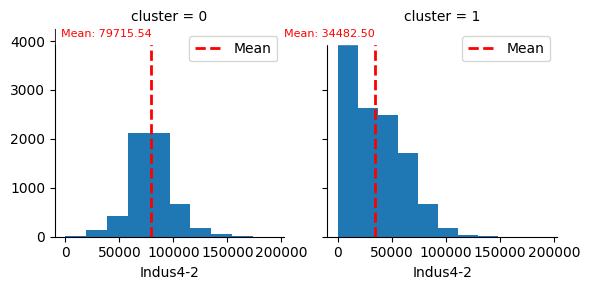

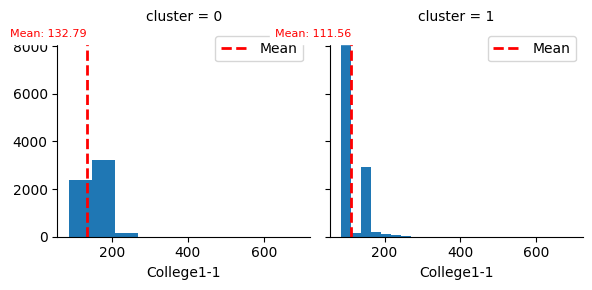

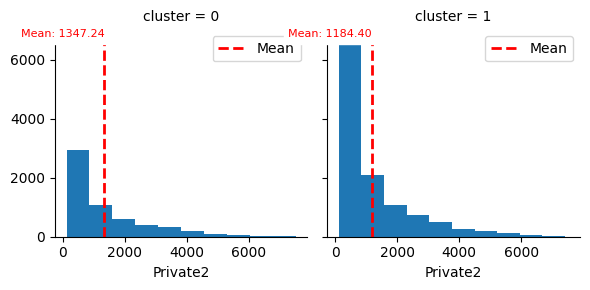

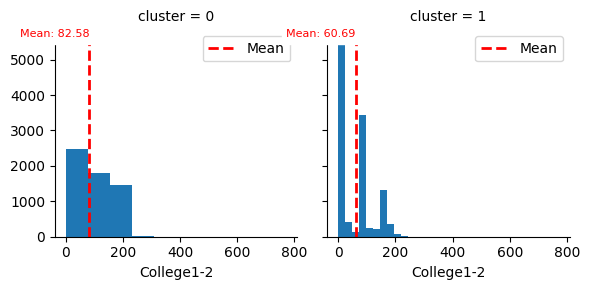

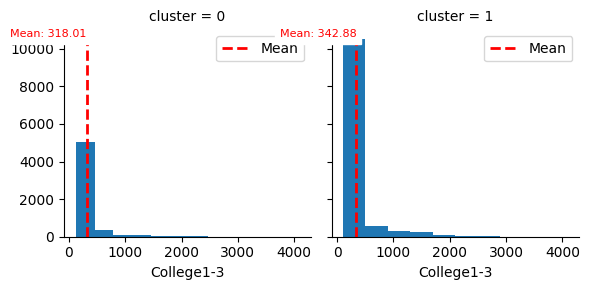

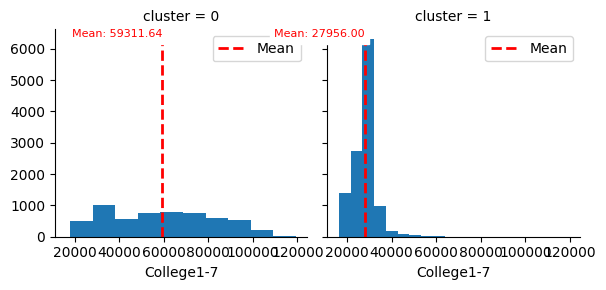

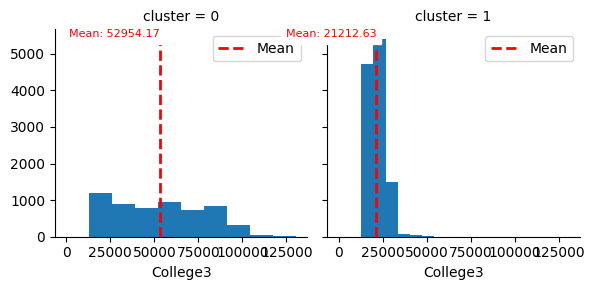

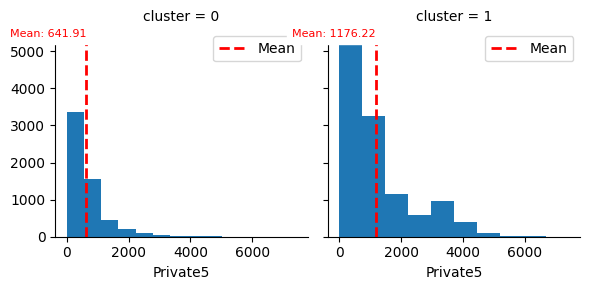

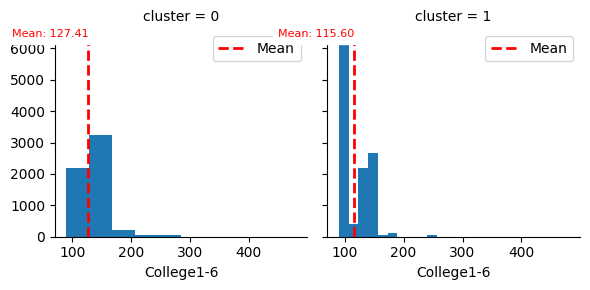

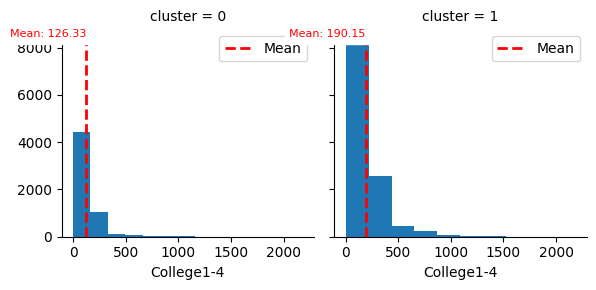

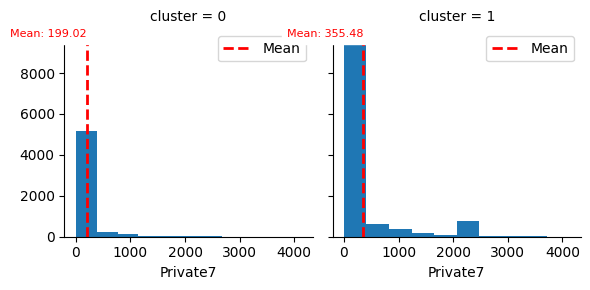

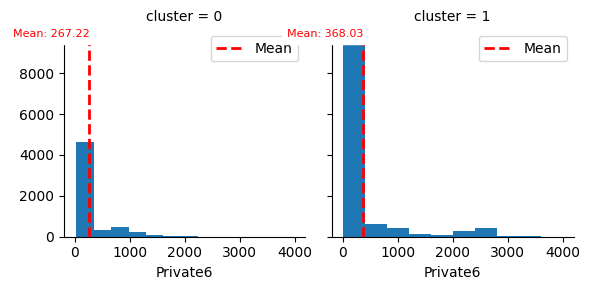

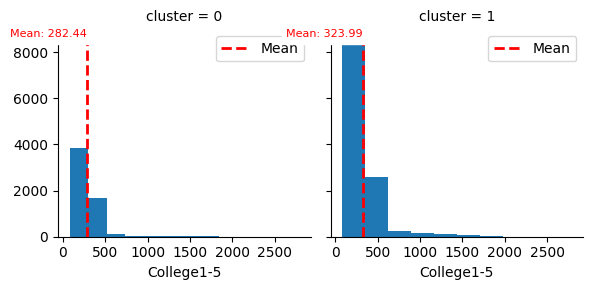

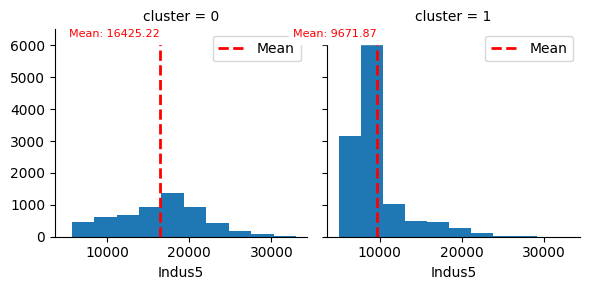

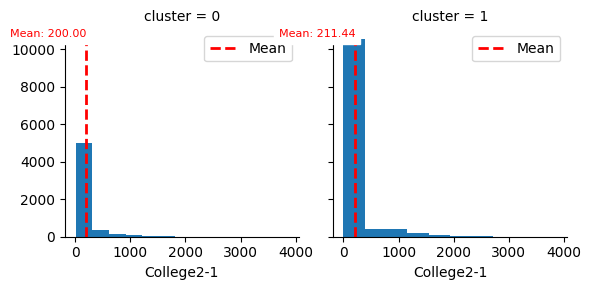

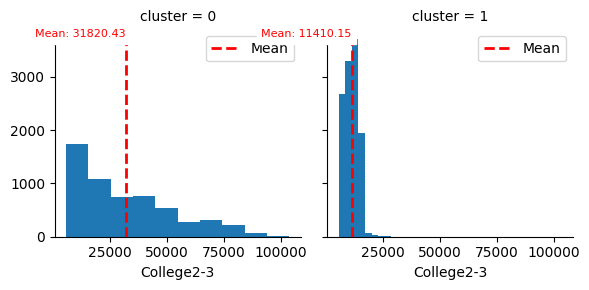

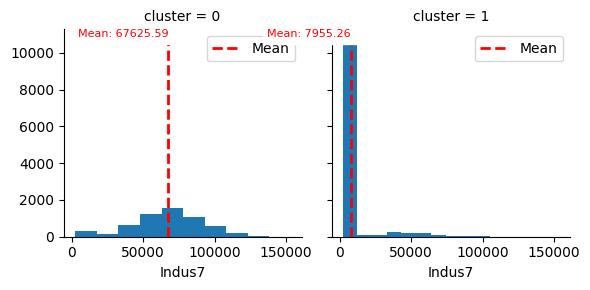

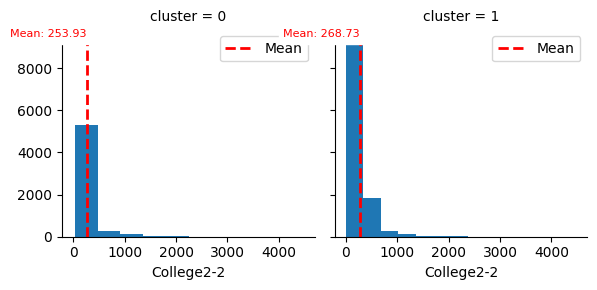

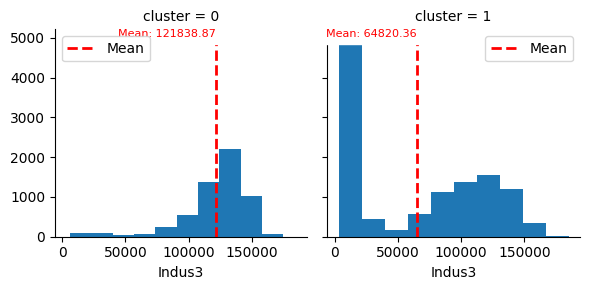

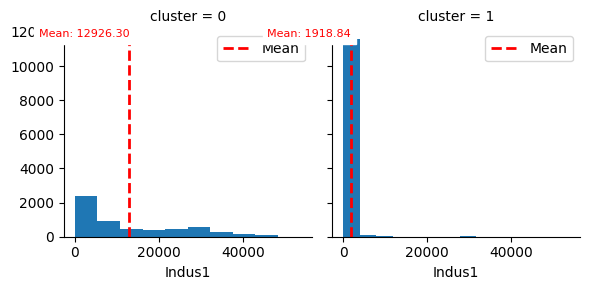

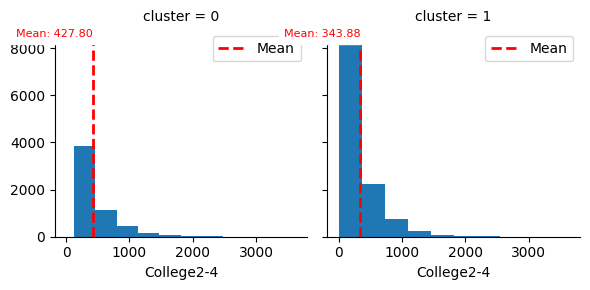

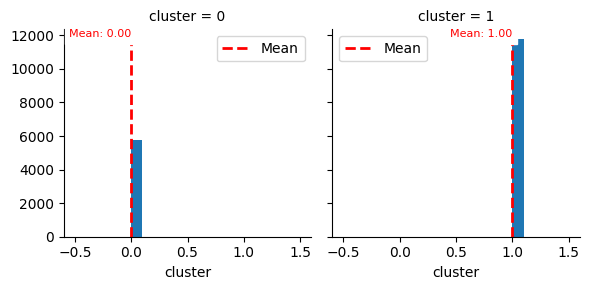

In [13]:
for c in clusters.columns:
    grid = sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

    # Calcul de la moyenne pour chaque cluster
    cluster_means = clusters.groupby('cluster')[c].mean()

    # Ajout de la moyenne comme trait vertical sur chaque graphique
    for i, ax in enumerate(grid.axes.flat):
        ax.axvline(cluster_means[i], color='r', linestyle='dashed', linewidth=2, label='Mean')
        ax.text(cluster_means[i], ax.get_ylim()[1], f'Mean: {cluster_means[i]:.2f}', color='r', ha='right', va='top', backgroundcolor='white', fontsize=8)
        ax.legend()

plt.show()

On affiche ensuite la moyenne de chaque colonnes de chaque client pour chaque cluster.

Observations :

- Le cluster 0 s'étend sur toutes les plages horaires en journée (entre 6h et 17h).

- Le cluster 1 couvre les heures en dehors des horaires du premier cluster (entre 18h et 5h).

- Les moyennes des colonnes College2-1, Private2, College1-1, College1-6, College1-2, College1-5, Private6, Private7, College1-4, College1-3, College2-2 et College2-4 restent constantes ou varient très faiblement entre les clusters, ne contribuant pas de manière significative à la séparation des clusters.

- En revanche, les moyennes de toutes les autres colonnes varient significativement entre les clusters, jouant un rôle crucial dans la distinction des clusters, notamment dans le cluster 0.

- Aucune ligne de consommation correspondant à un samedi ou à un dimanche n'apparaît dans le cluster 0.

### **Remarques :**

L'interprétation des clusters est claire ici. Il ne fait aucun doute que le cluster 0 correspond aux heures pleines, où les consommations sont les plus importantes, tandis que le cluster 1 correspond aux heures creuses.

On peut faire sauter ces lignes et réaficher les moyennes pour chacun des clients restants.

In [16]:
means = clusters.groupby('cluster').mean()

means=means.drop(['Heure','Jour','Mois','Année','Jour semaine','College2-1', 'Private2', 'College1-1', 'College1-6', 'College1-2', 'College1-5', 'Private6', 'Private7', 'College1-4', 'College1-3', 'College2-2','College2-4'],axis=1)
# Transposez le DataFrame pour avoir les clusters en colonnes
means = means.T

# Affichez les moyennes
print(means)

cluster                 0              1
AMTE4        10708.840933    2573.012232
AMTE3       273178.747825  103745.979103
AMTE2       253726.505395  104696.907917
Indus8        6609.530456    1528.236607
AMTE1       161668.116951   92283.596670
Indus4-1     77348.851375   34913.311247
Indus4-2     79715.541246   34482.500849
College1-7   59311.637081   27956.004361
College3     52954.171018   21212.630253
Private5       641.908806    1176.220693
Indus5       16425.223344    9671.869691
College2-3   31820.425890   11410.153995
Indus7       67625.594617    7955.261071
Indus3      121838.873419   64820.357628
Indus1       12926.296554    1918.839903


On pourra afficher la matrice de chaleur pour facilement lire ces informations. Mais il faudra re-standarizer les donner.

In [ ]:
scaler22 = MinMaxScaler()

means=means.T
for colonne in means.columns:
    means[colonne] = scaler22.fit_transform(means[colonne].values.reshape(-1, 1))


In [ ]:
means

,Unnamed: 0,AMTE4,Jour semaine,AMTE3,AMTE2,Indus8,AMTE1,Indus4-1,Indus4-2,College1-7,College3,Private5,Indus5,College2-3,Indus7,Indus3,Indus1
cluster,,,,,,,,,,,,,,,,,
0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


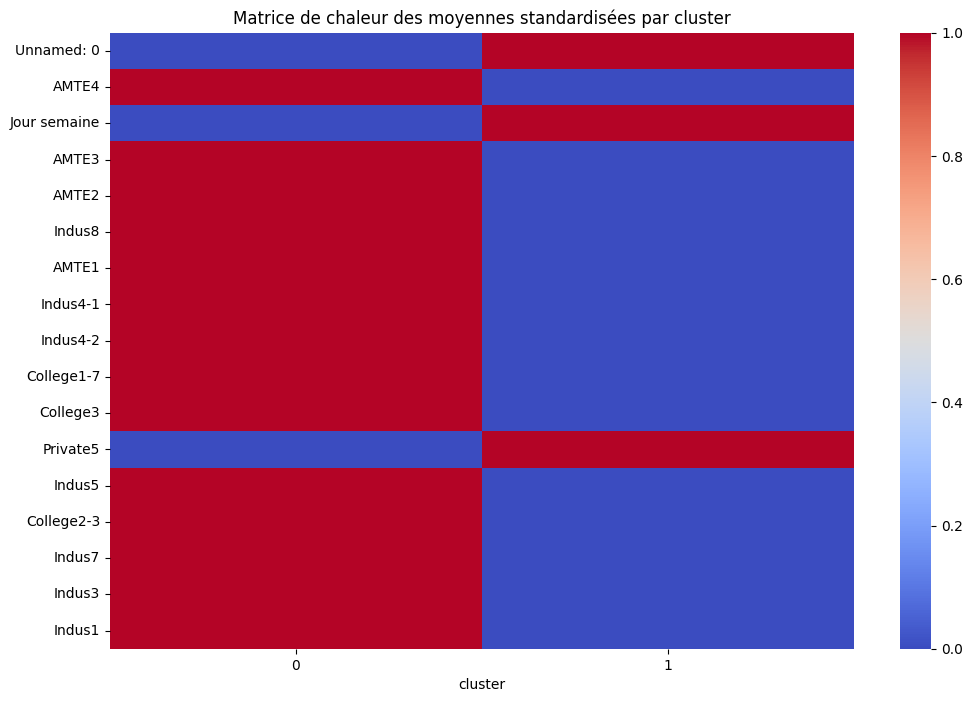

In [ ]:
means=means.T
# Créez une matrice de chaleur
plt.figure(figsize=(12, 8))
sns.heatmap(means, annot=False, cmap='coolwarm')
plt.title('Matrice de chaleur des moyennes standardisées par cluster')
plt.show()

In [ ]:
df_no_cluster = clusters.drop(['Heure','Jour','Mois','Année','cluster'], axis=1)
df_no_cluster

,Unnamed: 0,AMTE4,Jour semaine,AMTE3,AMTE2,Indus8,AMTE1,Indus4-1,Indus4-2,College1-1,...,Private6,College1-5,Indus5,College2-1,College2-3,Indus7,College2-2,Indus3,Indus1,College2-4
0,0,5000.0,5,64000.0,27000.0,2000.000000,42000.0,6000.0,6000.0,90.0,...,84.0,380.0,10333.333333,208.0,14333.333333,4333.333333,190.0,8666.666667,1666.666667,146.0
1,1,6000.0,5,67000.0,26000.0,2000.000000,42000.0,6000.0,6000.0,90.0,...,50.0,156.0,9333.333333,1560.0,14000.000000,4333.333333,168.0,9333.333333,1500.000000,132.0
2,2,5000.0,5,68000.0,26000.0,2000.000000,43000.0,7000.0,8000.0,88.0,...,126.0,246.0,10333.333333,1252.0,14000.000000,4000.000000,134.0,12333.333333,1666.666667,178.0
3,3,5000.0,5,66000.0,25000.0,2333.333333,43000.0,5000.0,5000.0,90.0,...,108.0,234.0,9333.333333,410.0,14666.666667,4333.333333,148.0,8333.333333,1666.666667,138.0
4,4,6000.0,5,69000.0,26000.0,2000.000000,41000.0,7000.0,6000.0,88.0,...,2498.0,326.0,10666.666667,246.0,14333.333333,4333.333333,206.0,8666.666667,1833.333333,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17513,17515,1000.0,5,65000.0,41000.0,833.333333,22000.0,7000.0,10000.0,96.0,...,76.0,1250.0,7333.333333,28.0,9833.333333,3833.333333,500.0,11000.000000,1666.666667,188.0
17514,17516,1000.0,5,71000.0,40000.0,833.333333,22000.0,7000.0,10000.0,94.0,...,72.0,1608.0,8000.000000,32.0,9833.333333,8000.000000,504.0,11333.333333,1666.666667,188.0
17515,17517,1000.0,5,73000.0,40000.0,666.666667,21000.0,7000.0,9000.0,96.0,...,58.0,882.0,7666.666667,54.0,10000.000000,6333.333333,546.0,9833.333333,1666.666667,192.0
17516,17518,1000.0,5,63000.0,40000.0,666.666667,22000.0,7000.0,9000.0,94.0,...,82.0,992.0,7000.000000,12.0,10333.333333,4000.000000,352.0,7666.666667,1833.333333,192.0


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_no_cluster)

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)


In [ ]:
fig = px.scatter_3d(
    clusters,
    x=pca_result[:, 0],
    y=pca_result[:, 1],
    z=pca_result[:, 2],
    color='cluster',
    size_max=30,
    opacity=0.7,
    title='Clusters dans l\'espace des composantes principales (3D)',
    labels={'0': 'Première composante principale', '1': 'Deuxième composante principale', '2': 'Troisième composante principale'}
)

# Afficher le graphique interactif
fig.show()

In [ ]:
result = clusters.groupby(['Heure', 'cluster']).size().reset_index(name='count')

In [ ]:
result

,Heure,cluster,count
0,0,1,730
1,1,1,730
2,2,1,728
3,3,1,730
4,4,1,730
5,5,0,50
6,5,1,680
7,6,0,277
8,6,1,453
9,7,0,454


In [ ]:
tableau_resultat = result.pivot(index='Heure', columns='cluster', values='count').fillna(0)
tableau_resultat

cluster,0,1
Heure,,
0,0.0,730.0
1,0.0,730.0
2,0.0,728.0
3,0.0,730.0
4,0.0,730.0
5,50.0,680.0
6,277.0,453.0
7,454.0,276.0
8,461.0,269.0


In [ ]:
resultat_2 = clusters.groupby(['Jour semaine', 'cluster']).size().reset_index(name='count')
tableau_resultat_2 = resultat_2.pivot(index='Jour semaine', columns='cluster', values='count').fillna(0)
tableau_resultat_2

cluster,0,1
Jour semaine,,
0,1154.0,1342.0
1,1203.0,1293.0
2,1218.0,1278.0
3,1162.0,1334.0
4,1007.0,1489.0
5,0.0,2544.0
6,0.0,2494.0
